In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 4.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

<ipython-input-2-8ea691785132>:42: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/Dataset/emotion-dataset/emotion_analysis.csv')
df.head()

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy


In [ ]:
df = pd.read_csv('drive/MyDrive/Dataset/text_emotion.csv') 
df

,tweet_id,sentiment,author,content
0,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
1,1956967696,sadness,coolhappinessky,happinesseral ceremony...gloomy friday...
2,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...
3,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about ..."
4,1956968636,worry,mcsleazy,Hmmm. http://www.djhero.com/ is down
...,...,...,...,...
25768,1753918900,happiness,courtside101,Succesfully following Tayla!!
25769,1753919001,love,drapeaux,Happy Mothers Day All my love
25770,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
25771,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
df_anger = pd.read_csv('drive/MyDrive/Dataset/emotion-intensity/anger_train.txt', sep='\t', header=None) 
df_fear = pd.read_csv('drive/MyDrive/Dataset/emotion-intensity/fear_train.txt', sep='\t', header=None) 
df_joy = pd.read_csv('drive/MyDrive/Dataset/emotion-intensity/joy_train.txt', sep='\t', header=None) 
df_sadness = pd.read_csv('drive/MyDrive/Dataset/emotion-intensity/sadness_train.txt', sep='\t', header=None) 

In [ ]:
df_intensity = pd.concat([df_anger, df_fear, df_joy, df_sadness], axis=0)
df_int = df_intensity.sample(frac=1).reset_index(drop=True)
df_int

,0,1,2,3
0,30016,"@WyoWiseGuy @LivingVertical however, REI did o...",joy,0.896
1,20630,@caeruleusV @Atheist_Penguin @misogynaut I thr...,fear,0.458
2,21032,You have a #problem? Yes! Can you do #somethin...,fear,0.250
3,40587,@janhopis I found the first few episodes of Bo...,sadness,0.354
4,40750,We stayed up all night long\nMade our drinks t...,sadness,0.200
...,...,...,...,...
3608,10770,#firsttweetever sippin #hotchocolate wondering...,anger,0.292
3609,10683,@JoeGoodmanJr. A solution. But the assumptions...,anger,0.354
3610,40040,After spending £450 @Debenhams I was offered a...,sadness,0.814
3611,30276,I'm a cheery ghost.,joy,0.580


In [ ]:
df_int.to_csv('all_emo_int.csv')

In [ ]:
df_int[2].value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: 2, dtype: int64

In [ ]:
df = pd.read_csv('drive/MyDrive/Dataset/emotion-dataset/training.csv')
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [ ]:
dataset_dir = df
glove_dir = 'glove\\glove.twitter.27B.100d.txt'

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk_stop_words = list(stopwords.words('english'))


In [ ]:
dataset = df

In [ ]:
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,Sl no,Tweets,Search key,Feeling
0,6691,"#22: @وجیہہ ed ""RT @bus_kerdou: Iqra has inte...",modesty,happy
1,5524,"#68: @Paula Doyle ed ""RT @365Smilemore: Relax...",relax,happy
2,7038,"#71: @Yanki ed ""RT @billboard: BTS has their ...",loyal,happy
3,4875,"#51: @Teresa Lott ed ""@NetflixFilm Admit it, ...",shame,disgust
4,790,"#28: @Doz ed ""RT @RocketIntellect: “The Warri...",jovial,happy


In [ ]:
emotion = np.array(dataset['Feeling'])

In [ ]:
class_values = dataset['Feeling'].unique()
print(class_values)

['happy' 'disgust' 'sad' 'angry' 'surprise' 'fear']


In [ ]:
dataset.groupby('Feeling')['Tweets'].count()


Feeling
angry       1341
disgust      637
fear         863
happy       3928
sad         2849
surprise     399
Name: Tweets, dtype: int64

<Axes: title={'center': 'Emotion Distribution'}, xlabel='Feeling'>

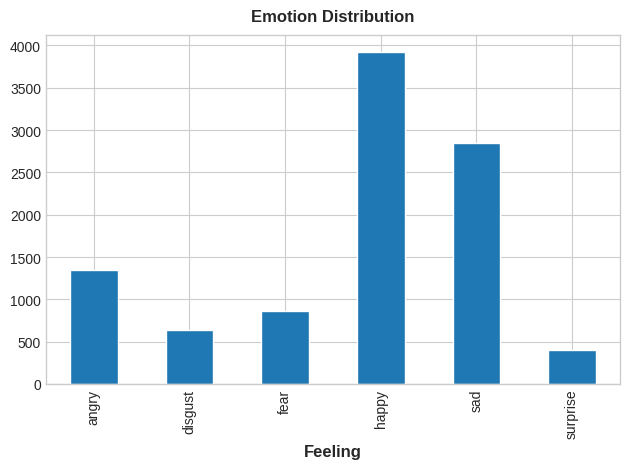

In [ ]:
dataset.groupby('Feeling')['Tweets'].count().plot(kind='bar' , title= 'Emotion Distribution')

In [ ]:
import re

import pickle as pkl
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from nltk import SnowballStemmer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation , Embedding, GlobalMaxPooling1D, Bidirectional

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def preprocess_word(word):
    # Remove punctuation
    word = word.strip('"?!,.():;')
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    word = re.sub(r'(.)\1+', r'\1\1', word)
    # Remove - & '
    #word = re.sub(r'(-|\')', '', word)
    return word


In [ ]:
def is_valid_word(word):
    # Check if word begins with an alphabet
    return (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None)

In [ ]:
def handle_emojis(text):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' smile ', text)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' laugh ', text)
    # Love -- <3, :*
    text = re.sub(r'(<3|:\*)', ' love ', text)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    text = re.sub(r'(;-?\)|;-?D|\(-?;)', ' affection ', text)
    # Sad -- :-(, : (, :(, ):, )-:
    text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' sad ', text)
    # Cry -- :,(, :'(, :"(
    text = re.sub(r'(:,\(|:\'\(|:"\()', ' cry ', text)
    return text

In [ ]:

def preprocess_text(text):
    processed_text = []
    # Convert to lower case
    text = text.lower()
    #HTML removed
    #html_process = BS(text, 'html.parser')
    #text = html_process.get_text()
    
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    
    # Replaces URLs with the word URL
    text = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' ', text)
    # Replace @handle with the word USER_MENTION
    text = re.sub(r'@[\S]+', ' ', text)
    # Replaces #hashtag with hashtag
    text = re.sub(r'#(\S+)', r' \1 ', text)
    # Remove RT (retext)
    text = re.sub(r'\brt\b', '', text)
    # Replace 2+ dots with space
    text = re.sub(r'\.{2,}', ' ', text)
    # Strip space, " and ' from text
    #text = text.strip(' "\'')
    # Replace emojis with either EMO_POS or EMO_NEG
    text = handle_emojis(text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Striping numbers from the text
    text = re.sub(r'\d+', '', text)
    
    
    words = text.split()
    
    stemmer = SnowballStemmer('english')

    #Removing Stop Words and Stemming the Words
    for word in words:
        word = preprocess_word(word)
        #if word not in nltk_stop_words and len(word)> 2:
        
        if is_valid_word(word):
            stemmed_words = stemmer.stem(word)
            processed_text.append(word)

    return ' '.join(processed_text)

In [ ]:
dataset['Tweets'] = dataset['Tweets'].map(lambda x: preprocess_text(x))
dataset.head()

,Sl no,Tweets,Search key,Feeling
0,6691,ed iqra has internalized the idea that modesty...,modesty,happy
1,5524,doyle ed relax be okay,relax,happy
2,7038,ed bts has their loyal fan army and ariana gra...,loyal,happy
3,4875,lott ed admit it you are a year old s kid are ...,shame,disgust
4,790,ed warriors left toyota center in great spirit...,jovial,happy


In [ ]:
def plot_model(history):
    # Plot training & validation accuracy values
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(emotion)

print(label_encoder.classes_)

label_OneHotEncoder = OneHotEncoder()
encoded_label = label_OneHotEncoder.fit_transform(encoded_label.reshape(-1,1)).toarray()

['angry' 'disgust' 'fear' 'happy' 'sad' 'surprise']


In [ ]:
vocabulary_size = 10000
input_length = 100

In [ ]:
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(dataset['Tweets'])
sequences = tokenizer.texts_to_sequences(dataset['Tweets'])
data = pad_sequences(sequences, maxlen = input_length)

file = open('saved_model\\tokenizer.pickle', 'wb')
pkl.dump(tokenizer, file, protocol = pkl.HIGHEST_PROTOCOL)
file.close()

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(data, encoded_label, test_size = 0.2)

In [ ]:
num_classes = len(class_values)
validation_split = 0.1

In [ ]:
output_dim = 1000
dense_input = 1000

l1_dropout = 0.2
l1_recurrent_dropout = 0.2

l2_dropout = 0.2
l2_recurrent_dropout = 0.2

l1_lstm_units = 128
l2_lstm_units = 64

validation_split = 0.2
epochs = 20

callback_patience = 2

In [ ]:
callback = [EarlyStopping(monitor='val_loss', patience = callback_patience)]

In [ ]:
model = Sequential()

model.add(Embedding(vocabulary_size, dense_input, input_length = input_length))
model.add(Dense(dense_input, activation='tanh'))

model.add(LSTM(l1_lstm_units, dropout = l1_dropout, recurrent_dropout = l1_recurrent_dropout, 
                             return_sequences = True, activation='tanh'))
model.add(LSTM(l2_lstm_units, dropout = l2_dropout, recurrent_dropout = l2_recurrent_dropout, 
                             return_sequences = False, activation='tanh'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 1000)         10000000  
                                                                 
 dense (Dense)               (None, 100, 1000)         1001000   
                                                                 
 lstm (LSTM)                 (None, 100, 128)          578048    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 11,628,846
Trainable params: 11,628,846
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data, train_label, validation_split = validation_split, epochs=epochs, 
                    shuffle = True, callbacks = callback)

# plot_model(history)

Epoch 1/20
201/201 [==============================] - 454s 2s/step - loss: 0.8929 - accuracy: 0.6764 - val_loss: 0.5085 - val_accuracy: 0.8571
Epoch 2/20
201/201 [==============================] - 420s 2s/step - loss: 0.3175 - accuracy: 0.8961 - val_loss: 0.4249 - val_accuracy: 0.8634
Epoch 3/20
201/201 [==============================] - 436s 2s/step - loss: 0.1597 - accuracy: 0.9402 - val_loss: 0.5531 - val_accuracy: 0.8484
Epoch 4/20
201/201 [==============================] - 424s 2s/step - loss: 0.1142 - accuracy: 0.9523 - val_loss: 0.5601 - val_accuracy: 0.8440


In [ ]:
model.evaluate(test_data, test_label, verbose = 1)

63/63 [==============================] - 21s 339ms/step - loss: 0.5887 - accuracy: 0.8413


[0.5887192487716675, 0.841317355632782]

In [ ]:
test_text = "@bbcweather Good to see more global awareness, thanks. #SemST"
test_text = pd.Series(preprocess_text(test_text))

sequences = tokenizer.texts_to_sequences(test_text)
data = pad_sequences(sequences, maxlen = input_length)

### sadness (0), joy (1), love (2), anger (3), fear (4)

In [ ]:
lbl = label_encoder.classes_[np.argmax(model.predict(data))]

1/1 [==============================] - 1s 750ms/step


In [ ]:
def label_tweet(twt):
  test_text = twt
  test_text = pd.Series(preprocess_text(test_text))

  sequences = tokenizer.texts_to_sequences(test_text)
  data = pad_sequences(sequences, maxlen = input_length)
  lbl = label_encoder.classes_[np.argmax(model.predict(data))]
  return lbl

In [ ]:
df_emo_test = pd.read_csv('drive/MyDrive/Dataset/emotion-dataset/test.csv')
df_emo_test

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
1995,i just keep feeling like someone is being unki...,3
1996,im feeling a little cranky negative after this...,3
1997,i feel that i am useful to my people and that ...,1
1998,im feeling more comfortable with derby i feel ...,1


In [ ]:
df_emo_test['pred emotion'] = df_emo_test['text'].apply(lambda func: label_tweet(func))

In [ ]:
df_emo_test.to_csv("emo_test.csv")